In [2]:
import matplotlib
matplotlib.use('TkAgg') #crashes when using %matplotlib qt

In [3]:
# %%python
import numpy
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import PySpin
from datetime import datetime
import os
import math
import tkinter as Tk


def draw_line(canvas, image):
    ax = plt.gca()
    xy = plt.ginput(2)        
    x = [p[0] for p in xy]
    y = [p[1] for p in xy]
    line = plt.plot(x,y, 'r')
    #ax.figure.canvas.draw()
    #self.lines.append(line)
    distance = math.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
    distance_s = '%4.3f' % distance
    bbox_props = dict(boxstyle="round,pad=0.3", facecolor='beige', alpha=1.0, lw=2)
    fig = plt.gcf()
    size = fig.get_size_inches()*fig.dpi # size in pixels
    t = ax.text(.5*numpy.shape(image)[1], 0, 'The distance is '+distance_s+' px', ha="center", va="center", size=20,bbox=bbox_props)
    canvas.draw()
    print('The distance in pixels is %4.3f' % distance)

def app():
    root = Tk.Tk()
    root.wm_title("minimal example")

    image=plt.imread('C:\\Users\\bwilks\\volume.png')
    fig = plt.figure(figsize=(10,10))
    # im = plt.imshow(image) # later use a.set_data(new_data)
    plt.imshow(image, cmap='gray')
    ax = plt.gca()
    ax.set_xticklabels([]) 
    ax.set_yticklabels([]) 

    # a tk.DrawingArea
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)

    #ld = LineDrawer()
    draw_line(canvas, image) # here you click on the plot

    def quit(*args):
        root.quit()     
        root.destroy() 

    button_quit = Tk.Button(master = root, text = 'Quit', command = quit)
    root.protocol("WM_DELETE_WINDOW", quit)

    button_quit.pack(side=Tk.LEFT)

    Tk.mainloop()

In [3]:
app()

The distance in pixels is 2296.804


In [6]:
plt.figure.

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [ ]:
filename

In [11]:
import matplotlib as mpl
import numpy as np
import sys
if sys.version_info[0] < 3:
    import Tkinter as tk
else:
    import tkinter as tk
import matplotlib.backends.tkagg as tkagg
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg


def draw_figure(canvas, figure, loc=(0, 0)):
    """ Draw a matplotlib figure onto a Tk canvas

    loc: location of top-left corner of figure on canvas in pixels.
    Inspired by matplotlib source: lib/matplotlib/backends/backend_tkagg.py
    """
    figure_canvas_agg = FigureCanvasAgg(figure)
    figure_canvas_agg.draw()
    figure_x, figure_y, figure_w, figure_h = figure.bbox.bounds
    figure_w, figure_h = int(figure_w), int(figure_h)
    photo = tk.PhotoImage(master=canvas, width=figure_w, height=figure_h)

    # Position: convert from top-left anchor to center anchor
    canvas.create_image(loc[0] + figure_w/2, loc[1] + figure_h/2, image=photo)

    # Unfortunately, there's no accessor for the pointer to the native renderer
    tkagg.blit(photo, figure_canvas_agg.get_renderer()._renderer, colormode=2)

    # Return a handle which contains a reference to the photo object
    # which must be kept live or else the picture disappears
    return photo

# Create a canvas
w, h = 1300, 1200
window = tk.Tk()
window.title("A figure in a canvas")
canvas = tk.Canvas(window, width=w, height=h)
canvas.pack()

# Generate some example data
X = np.linspace(0, 2 * np.pi, 50)
Y = np.sin(X)

# Create the figure we desire to add to an existing canvas
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(X, Y)

# Keep this handle alive, or else figure will disappear
fig_x, fig_y = 100, 100
fig_photo = draw_figure(canvas, fig, loc=(fig_x, fig_y))
fig_w, fig_h = fig_photo.width(), fig_photo.height()

# Add more elements to the canvas, potentially on top of the figure
canvas.create_line(200, 50, fig_x + fig_w / 2, fig_y + fig_h / 2)
canvas.create_text(200, 50, text="Zero-crossing", anchor="s")

# Let Tk take over
tk.mainloop()

C:\Users\bwilks\AppData\Local\Continuum\anaconda3\envs\usb_cam\lib\site-packages\matplotlib\backends\tkagg.py:10: MatplotlibDeprecationWarning: 
The matplotlib.backends.tkagg module is deprecated.
  "3.0", "The matplotlib.backends.tkagg module is deprecated.")


In [17]:
import matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

import tkinter as tk
from tkinter import ttk


LARGE_FONT= ("Verdana", 12)


class SeaofBTCapp(tk.Tk):

    def __init__(self, *args, **kwargs):
        
        tk.Tk.__init__(self, *args, **kwargs)

#         tk.Tk.iconbitmap(self, default="clienticon.ico")
        tk.Tk.wm_title(self, "Sea of BTC client")
        
        
        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand = True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}

        for F in (StartPage, PageOne, PageTwo, PageThree):

            frame = F(container, self)

            self.frames[F] = frame

            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame(StartPage)

    def show_frame(self, cont):

        frame = self.frames[cont]
        frame.tkraise()

        
class StartPage(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self,parent)
        label = tk.Label(self, text="Start Page", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button = ttk.Button(self, text="Visit Page 1",
                            command=lambda: controller.show_frame(PageOne))
        button.pack()

        button2 = ttk.Button(self, text="Visit Page 2",
                            command=lambda: controller.show_frame(PageTwo))
        button2.pack()

        button3 = ttk.Button(self, text="Graph Page",
                            command=lambda: controller.show_frame(PageThree))
        button3.pack()


class PageOne(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Page One!!!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        button2 = ttk.Button(self, text="Page Two",
                            command=lambda: controller.show_frame(PageTwo))
        button2.pack()


class PageTwo(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Page Two!!!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        button2 = ttk.Button(self, text="Page One",
                            command=lambda: controller.show_frame(PageOne))
        button2.pack()


class PageThree(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Graph Page!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()

        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        a.plot([1,2,3,4,5,6,7,8],[5,6,1,3,8,9,3,5])

        

        canvas = FigureCanvasTkAgg(f, self)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2TkAgg(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        

app = SeaofBTCapp()
app.mainloop()

NameError: name 'NavigationToolbar2TkAgg' is not defined

In [7]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(x)
 
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'b-') 
 
for phase in np.linspace(0, 10*np.pi, 100):
    line1.set_ydata(np.sin(0.5 * x + phase))
    fig.canvas.draw()

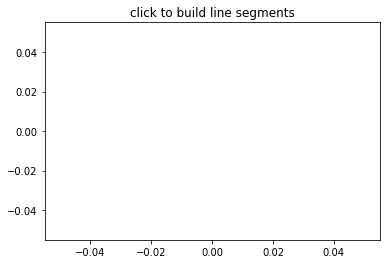

In [9]:

from matplotlib import pyplot as plt
plt.ion()
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()